In [1]:
import polars as pl

# Dependency Detection + Violations

In [2]:
# This is the same dataset as used in 
# the demo by Microsoft: https://learn.microsoft.com/en-us/fabric/data-science/semantic-link-validate-data
# However, dsds will be an open source package based on Polars, not
# FabricDataFrame, which is a Microsoft product.
import dsds.diagnosis as dia

df = pl.read_csv("../data/providers.csv")
df.head()

Id,ORGANIZATION,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE,ZIP,LAT,LON,UTILIZATION
str,str,str,str,str,str,str,str,str,f64,f64,i64
"""3421aa75-dec7-…","""ef58ea08-d883-…","""Tomas436 Sauer…","""M""","""GENERAL PRACTI…","""60 HOSPITAL RO…","""LEOMINSTER""","""MA""","""01453""",42.520838,-71.770876,1557
"""c9b3c857-2e24-…","""69176529-fd1f-…","""Suzette512 Mon…","""F""","""GENERAL PRACTI…","""330 MOUNT AUBU…","""CAMBRIDGE""","""MA""","""02138""",42.375967,-71.118275,2296
"""0359f968-d1a6-…","""5e765f2b-e908-…","""Gaynell126 Str…","""F""","""GENERAL PRACTI…","""211 PARK STREE…","""ATTLEBORO""","""MA""","""02703""",41.931653,-71.294503,2287
"""446d1609-858f-…","""f1fbcbfb-fcfa-…","""Patricia625 Sa…","""F""","""GENERAL PRACTI…","""ONE GENERAL ST…","""LAWRENCE""","""MA""","""01842""",42.700273,-71.161357,1327
"""e6283e46-fd81-…","""e002090d-4e92-…","""Jeanmarie510 B…","""F""","""GENERAL PRACTI…","""1493 CAMBRIDGE…","""CAMBRIDGE""","""MA""","""02138""",42.375967,-71.118275,3199


In [3]:
# cols = ["Id", "ORGANIZATION", "NAME", "GENDER", "ADDRESS", "CITY", "SPECIALITY", "STATE", "ZIP", "UTILIZATION", "LON", "LAT"] # "LAT", "LON"]
entropy, tree = dia.dependency_detection(df, threshold=0.015)

INFO:dsds.diagnosis:Detecting dependency for all columns in dataframe. A total of 66 comparisons will be done.
INFO:dsds.diagnosis:The following columns are not considered because they are constants: ['STATE']


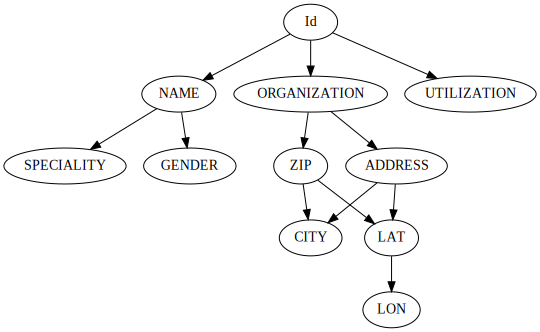

In [4]:
tree 

In [5]:
violations = dia.dependency_violation(df, entropy, threshold=0.05)

In [7]:
with pl.Config(fmt_str_lengths=50):
    for k, v in violations.items():
        print(k)
        print(v)

GENDER-NAME
shape: (3, 4)
┌────────────────────┬───────┬───────────────────────────┬──────────────────────────────────┐
│ Column Name: NAME  ┆ count ┆ Col GENDER: Value & Count ┆ Reason                           │
│ ---                ┆ ---   ┆ ---                       ┆ ---                              │
│ str                ┆ u32   ┆ list[struct[2]]           ┆ str                              │
╞════════════════════╪═══════╪═══════════════════════════╪══════════════════════════════════╡
│ Drew592 Cassin499  ┆ 2     ┆ [{"M",1}, {"F",1}]        ┆ `NAME` should uniquely determine │
│                    ┆       ┆                           ┆ `GENDER`                         │
│ Dorian295 Lind531  ┆ 2     ┆ [{"M",1}, {"F",1}]        ┆ `NAME` should uniquely determine │
│                    ┆       ┆                           ┆ `GENDER`                         │
│ Joe656 Connelly992 ┆ 2     ┆ [{"F",1}, {"M",1}]        ┆ `NAME` should uniquely determine │
│                    ┆       ┆    

# General Data Prescreen

In [8]:
import dsds.prescreen as ps

In [9]:
df = pl.read_csv("../data/train2.csv").with_columns(
    pl.col("Lead_Creation_Date").str.to_date(format=r"%d/%m/%y")
)
df.head()

ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
str,str,str,date,str,str,str,str,i64,f64,str,str,str,str,str,f64,i64,i64,f64,i64,i64,i64
"""APPC9049317122…","""Female""","""23/07/79""",2016-07-15,"""C10001""","""A""","""COM0044082""","""A""",4,2000.0,"""B001""","""P""","""N""","""S122""","""G""",0.0,null,null,null,null,0,0
"""APPD4061126334…","""Male""","""07/12/86""",2016-07-04,"""C10003""","""A""","""COM0000002""","""C""",1,3500.0,"""B002""","""P""","""Y""","""S122""","""G""",0.0,20000,2,13.25,953,10,0
"""APPE7028924942…","""Male""","""10/12/82""",2016-07-19,"""C10125""","""C""","""COM0005267""","""C""",4,2250.0,"""B003""","""G""","""Y""","""S143""","""B""",0.0,45000,4,null,null,0,0
"""APPF8027386553…","""Male""","""30/01/89""",2016-07-09,"""C10477""","""C""","""COM0004143""","""A""",4,3500.0,"""B003""","""G""","""Y""","""S143""","""B""",0.0,92000,5,null,null,7,0
"""APPG6099443664…","""Male""","""19/04/85""",2016-07-20,"""C10002""","""A""","""COM0001781""","""A""",4,10000.0,"""B001""","""P""","""Y""","""S134""","""B""",2500.0,50000,2,null,null,10,0


In [10]:
ps.over_time_report_num(
    df,
    time_col = "Lead_Creation_Date",
    cols = ["Interest_Rate", "Loan_Period", "Loan_Amount", "Existing_EMI", "EMI", "Var1", "Approved"],
    interval = "monthly"
)

feature,year,month,count,5%_quantile,95%_quantile,null%,mean,null_PoP_%diff,mean_PoP_%diff,null_%diff_overall,mean_%diff_overall
str,i32,u32,u32,f64,f64,f64,f64,f64,f64,f64,f64
"""Approved""",2016,7,21576,0.0,0.0,0.0,0.014368,null,null,inf,-0.018016
"""Approved""",2016,8,22404,0.0,0.0,0.0,0.016247,inf,0.130798,inf,0.110425
"""Approved""",2016,9,25733,0.0,0.0,0.0,0.013446,inf,-0.17242,inf,-0.081034
"""EMI""",2016,7,21576,349.0,2457.0,0.645578,1072.715706,null,null,-0.051264,-0.026102
"""EMI""",2016,8,22404,318.0,2594.0,0.666756,1101.787168,0.032804,0.027101,-0.020141,0.000291
"""EMI""",2016,9,25733,346.0,2693.0,0.721641,1131.824934,0.082317,0.027263,0.060518,0.027562
"""Existing_EMI""",2016,7,21576,0.0,1940.0,0.0,399.605358,null,null,-1.0,0.107159
"""Existing_EMI""",2016,8,22404,0.0,1830.0,0.000089,376.982564,inf,-0.056613,-0.877975,0.044479
"""Existing_EMI""",2016,9,25733,0.0,1650.0,0.001904,314.435838,20.330509,-0.165914,1.602851,-0.128815


In [11]:
ps.corr_report(
    df
    , features = ["Interest_Rate", "Loan_Period", "Loan_Amount", "Existing_EMI", "EMI", "Approved"]
    , targets = ["Approved", "Var1"]
)

features,Approved,Var1
str,f64,f64
"""Interest_Rate""",-0.094387,-0.554138
"""Loan_Period""",-0.000375,-0.065702
"""Loan_Amount""",0.046502,0.307945
"""Existing_EMI""",0.027821,0.00662
"""EMI""",0.050129,0.293474
"""Approved""",1.0,0.11244


In [12]:
ps.infer_highly_correlated(
    df, threshold=0.5
)

features,corr > 0.50,corr < -0.50
str,list[null],list[null]


In [13]:
ps.str_cats_report(df)

feature,n_unique,has_null,category_w_min_count,min_count,category_w_max_count,max_count,avg_count,min_successive_diff,avg_successive_diff,max_successive_diff
str,u32,bool,str,u32,str,u32,f64,i64,f64,i64
"""ID""",69713,false,"""APPA1000090502…",1,"""APPZ9099717294…",1,1.0,0,0.0,0
"""Gender""",2,false,"""Female""",29764,"""Male""",39949,34856.5,10185,10185.0,10185
"""DOB""",10760,true,"""01/01/53""",1,"""11/01/82""",253,6.478903,0,0.023422,70
"""City_Code""",679,true,"""C10435""",1,"""C10001""",10007,102.670103,0,14.758112,2823
"""City_Category""",4,true,null,814,"""A""",49885,17428.25,4374,16357.0,38191
"""Employer_Code""",36618,true,"""COM0001195""",1,null,4018,1.90379,0,0.109703,3561
"""Employer_Categ…",4,true,null,4018,"""A""",33336,17428.25,3753,9772.666667,15280
"""Customer_Exist…",58,true,"""B057""",1,"""B001""",14197,1201.948276,0,249.052632,5150
"""Primary_Bank_T…",3,true,null,9391,"""P""",39619,23237.666667,11312,15114.0,18916


In [14]:
ps.get_datetime_cols(df)

['Lead_Creation_Date']

In [15]:
ps.check_binary_target(df, "Approved")

True

In [16]:
ps.infer_nulls(df)

['Interest_Rate', 'EMI']

In [17]:
ps.infer_highly_unique(df)

['ID']

In [18]:
ps.infer_constants(df)

[]